# Importing the dataset

In [1]:
#This step imports the dataset
import pandas as pd
file = "C:/Users/seerl/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)

C:\Users\seerl\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\seerl\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


# Downloading stop words

In [2]:
#This step downloads the stop words
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'re', 'so', 'm', 'haven', 'same', 's', 'ma', 'just', 'ourselves', 've', 'he', 'about', 'whom', 'you', 'will', 'my', 'your', "hadn't", 'above', 'over', "doesn't", "mustn't", 'not', 'few', 'of', 'no', 'once', 'can', 'his', 'out', 'being', 'again', 'isn', 'were', 'there', 'now', 'him', 'didn', 'an', 'where', "haven't", 'such', 'any', 'they', 'been', 'doing', 'between', 'themselves', "you're", 'but', 'with', 'this', "won't", 'when', 't', 'are', 'shouldn', 'be', 'have', 'for', 'himself', 'here', "isn't", "you've", 'me', "weren't", 'their', "shouldn't", 'own', 'very', "couldn't", "you'd", 'each', 'these', 'than', 'weren', 'those', 'or', 'hadn', 'only', 'aren', 'wouldn', 'shan', 'which', 'what', 'do', 'had', "it's", 'does', 'yourself', 'myself', 'should', 'during', 'and', 'hers', 'up', 'as', 'theirs', 'nor', 'some', "needn't", 'am', 'yours', 'who', "wouldn't", "she's", "should've", 'if', 'in', 'until', "you'll", 'having', 'under', 'because', 'mustn', 'has', 'further', 'y', 'against', 'on', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seerl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pre Processing Pipeline

In [3]:
#This step creates a pipeline and remove_stop is a user defined function which removes all the stop words
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

# Counting the tokens

In [13]:
#This step is used for counting the tokens
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# Drawing the Word cloud

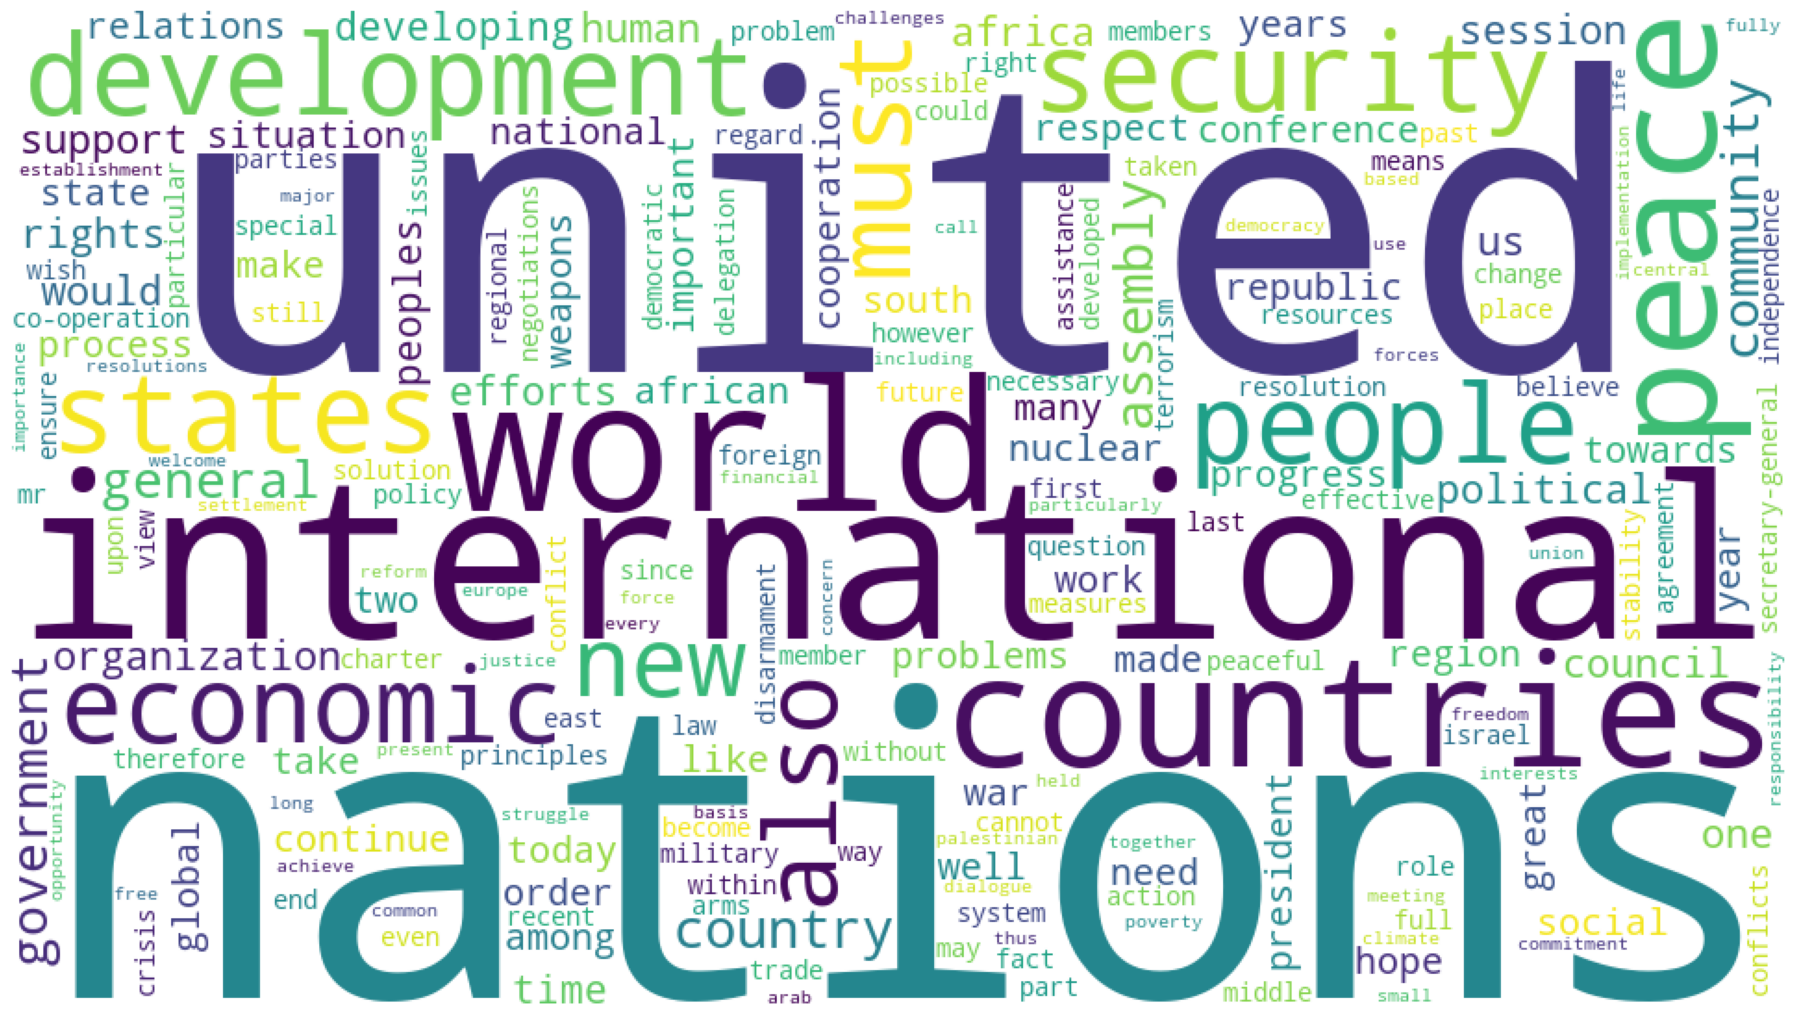

In [14]:
#This step is used to draw the Word cloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 960, height=540, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Creating TFIDF

In [16]:
#This step is used for creating a TFIDF
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'tokens'
    return idf_df
idf_df = compute_idf(df)


In [17]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


# Creating Word cloud for TFIDF

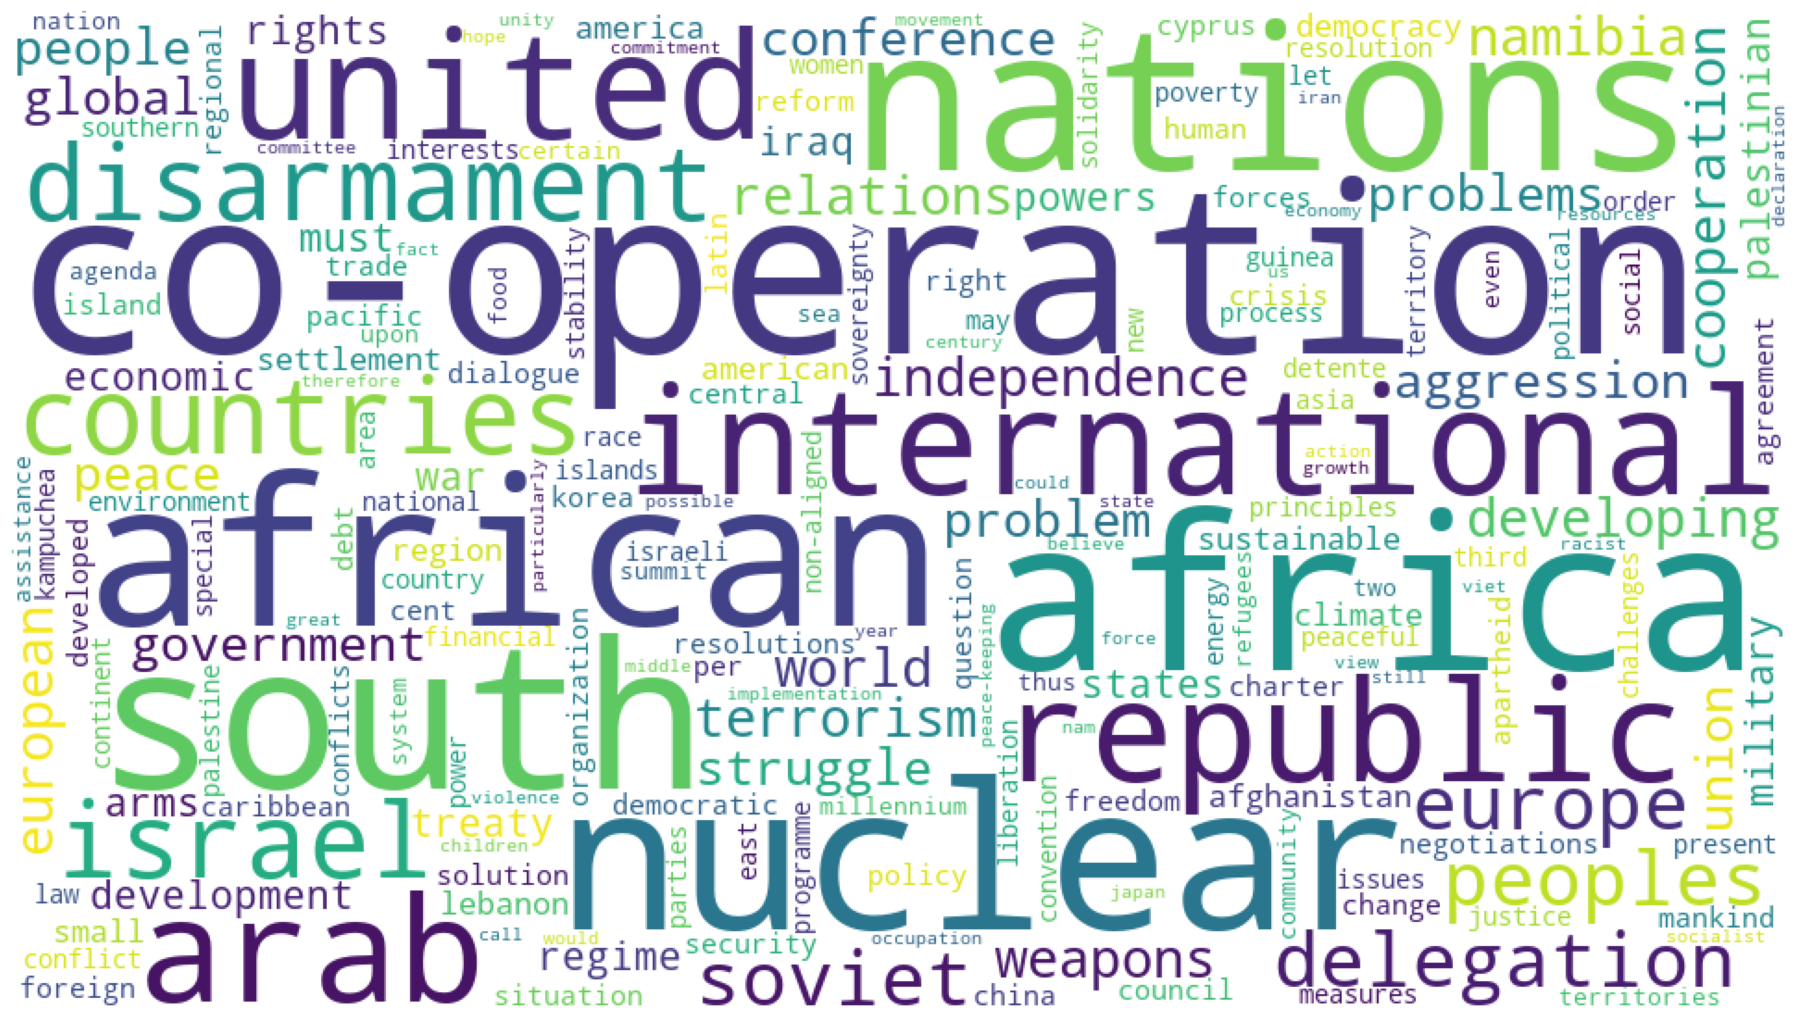

In [18]:
#This step is used to create the word cloud for the TFIDF
wc = WordCloud(background_color='white', width = 960, height=540, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Function to count keywords for Heatmaps

In [9]:
#This step is used to count keywords for generating heatmaps
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Function to group by year

In [10]:
#This function is used to group the data by year
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


# Plotting the seaborn plot for Heatmaps

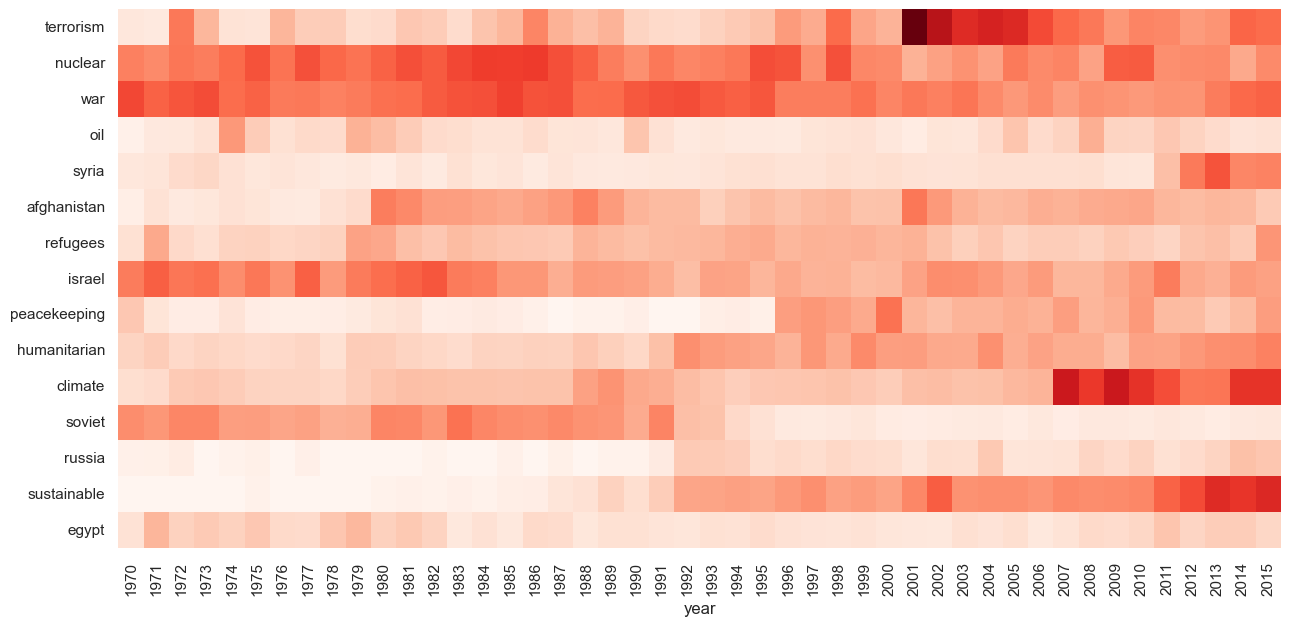

In [11]:
#This step is used to plot the seaborn plot for the heatmaps
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
